In [31]:
import pandas as pd
import utils as ut

In [34]:
# Генерация признаков
path = "./data/test.csv"
feature_construct = ut.load_feature_constructor()
test_data = feature_construct(path)

In [3]:
# Загрузка модели
path = "./models/RandomForest.pkl"
model = ut.load_model(path)

In [4]:
    # Обучение модели на каких-то новых данных:
path = "./data/train.csv"
train_data = pd.read_csv(path, index_col=0)
model.fit(*ut.split_to_x_y(train_data, 'y'))
model.save_model()

In [5]:
# Получение предикта
clf_report = model.predict(*ut.split_to_x_y(test_data, 'y'))
clf_report.predict.to_csv('../result.csv', index_label='id')

**0 = NO**, **1 = YES**

In [6]:
result = pd.read_csv('../result.csv', index_col=0)
result

,0,1
id,,
20806,0.97,0.03
32487,1.00,0.00
6605,0.51,0.49
27542,0.96,0.04
37202,0.11,0.89
...,...,...
9114,0.80,0.20
34005,0.79,0.21
12177,0.99,0.01


In [39]:
from dataclasses import dataclass

@dataclass
class Person:
    probability: float
    ID: int


In [70]:
persons = [Person(probability=probability, ID=ID) for ID, probability in zip(result.index, result['1'].values)]

In [75]:
persons

[Person(probability=0.03, ID=20806),
 Person(probability=0.0, ID=32487),
 Person(probability=0.49, ID=6605),
 Person(probability=0.04, ID=27542),
 Person(probability=0.89, ID=37202),
 Person(probability=0.0, ID=323),
 Person(probability=0.01, ID=6431),
 Person(probability=0.53, ID=5383),
 Person(probability=0.69, ID=40964),
 Person(probability=0.21, ID=33399),
 Person(probability=0.0, ID=22468),
 Person(probability=0.01, ID=5566),
 Person(probability=0.06, ID=18863),
 Person(probability=0.88, ID=9941),
 Person(probability=0.0, ID=24357),
 Person(probability=0.23, ID=5091),
 Person(probability=0.02, ID=25242),
 Person(probability=0.01, ID=32450),
 Person(probability=0.75, ID=38954),
 Person(probability=0.19, ID=24300),
 Person(probability=0.03, ID=24838),
 Person(probability=0.24, ID=37784),
 Person(probability=0.33, ID=30354),
 Person(probability=0.08, ID=22720),
 Person(probability=0.75, ID=14461),
 Person(probability=0.0, ID=3312),
 Person(probability=0.25, ID=25924),
 Person(probabi

array([[<Axes: title={'center': '1'}>]], dtype=object)

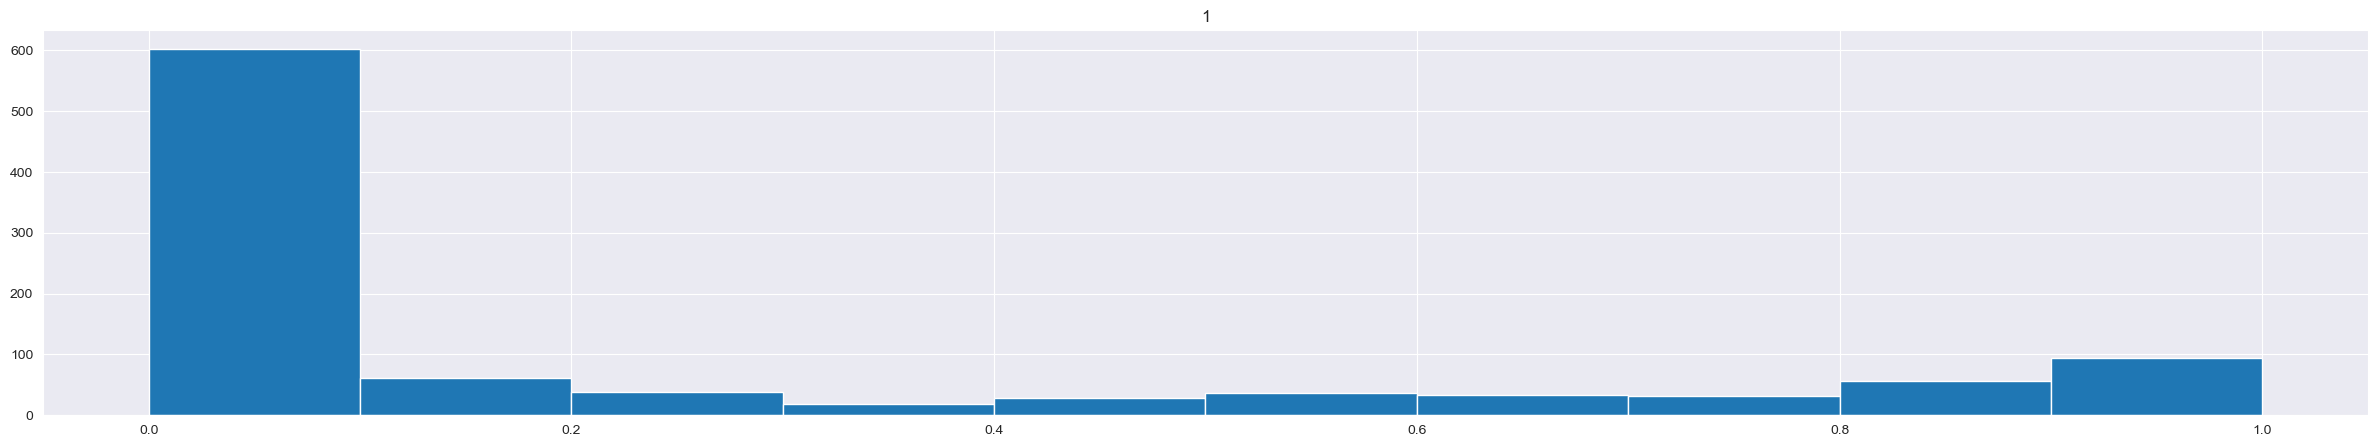

In [7]:
import seaborn as sns
result.drop(columns='0').hist(figsize=(30, 5))

# Получим топ 3 важных признака (что влияло больше всего на то, что человек оформит депозит)

**Определим метод, который получает индексы признаков каждой категории:**

In [8]:
def get_feature_indexes(cols, features):
    indexes = []
    for feature in features:
        ind = list(cols).index(feature)
        indexes.append(ind)
    return indexes

**Определим метод, который получает долю важности признаков при прогнозе для конкретного пользователя**

In [9]:
from sklearn.preprocessing import MinMaxScaler

def get_importance(df, feature_importance_, ID, feature_ind):
    values = df.loc[ID].values[feature_ind]
    importance = feature_importance_[feature_ind]
    res = pd.DataFrame(values * importance, columns=['importance'])
    res.index = df.loc[ID].iloc[feature_ind].index
    scaler = MinMaxScaler()
    res['importance'] = scaler.fit_transform(res['importance'].values.reshape(-1, 1))

    return res.sort_values(by=['importance'])

**Выделим бинарные, количественные и числовые признаки:**

In [10]:
bin_f = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'pdays']
count_f = ['age', 'month', 'day_of_week']
num_f = ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**Получим важность признаков модели:**

In [11]:
fi = model.model.feature_importances_
imp_test = test_data.drop(columns='y')

In [12]:
bin_f_ind = get_feature_indexes(imp_test.columns, bin_f)
count_f_ind = get_feature_indexes(imp_test.columns, count_f)
num_f_ind = get_feature_indexes(imp_test.columns, num_f)

ID = 6605  # 323, 6605
bin_f_imp = get_importance(imp_test, fi, ID, bin_f_ind)
count_f_imp = get_importance(imp_test, fi, ID, count_f_ind)
num_f_imp = get_importance(imp_test, fi, ID, num_f_ind)

print('Бинарные признаки:\n', bin_f_imp.iloc[len(bin_f_imp) - 3 :len(bin_f_imp)])
print('Количественные признаки:\n', count_f_imp.iloc[len(count_f_imp) - 3 :len(count_f_imp)])
print('Числовые признаки:\n', num_f_imp.iloc[len(num_f_imp) - 3 :len(num_f_imp)])

# print(bin_f_imp)
# print(count_f_imp)
# print(num_f_imp)

Бинарные признаки:
          importance
contact    0.937230
housing    0.957223
marital    1.000000
Количественные признаки:
              importance
age            0.000000
day_of_week    0.743101
month          1.000000
Числовые признаки:
                 importance
cons.price.idx    0.009180
duration          0.516277
nr.employed       1.000000


array([[<Axes: title={'center': '1'}>]], dtype=object)

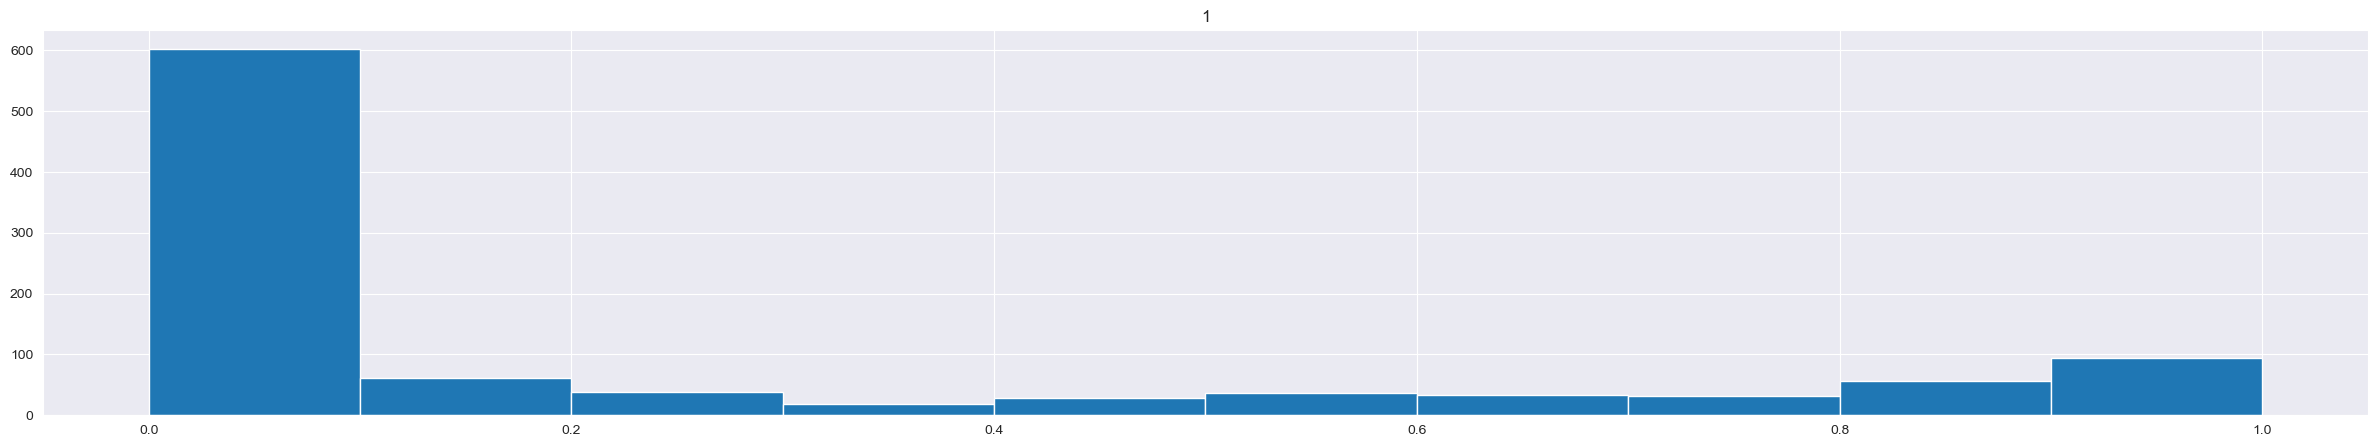

In [13]:
import seaborn as sns
result.drop(columns='0').hist(figsize=(30, 5))

# Получим топ 3 важных признака (что влияло больше всего на то, что человек оформит депозит)

**Определим метод, который получает индексы признаков каждой категории:**

In [14]:
def get_feature_indexes(cols, features):
    indexes = []
    for feature in features:
        ind = list(cols).index(feature)
        indexes.append(ind)
    return indexes

**Определим метод, который получает долю важности признаков при прогнозе для конкретного пользователя**

In [15]:
from sklearn.preprocessing import MinMaxScaler

def get_importance(df, feature_importance_, ID, feature_ind):
    values = df.loc[ID].values[feature_ind]
    importance = feature_importance_[feature_ind]
    res = pd.DataFrame(values * importance, columns=['importance'])
    res.index = df.loc[ID].iloc[feature_ind].index
    scaler = MinMaxScaler()
    res['importance'] = scaler.fit_transform(res['importance'].values.reshape(-1, 1))

    return res.sort_values(by=['importance'])

**Выделим бинарные, количественные и числовые признаки:**

In [16]:
bin_f = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'pdays']
count_f = ['age', 'month', 'day_of_week']
num_f = ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**Получим важность признаков модели:**

In [17]:
fi = model.model.feature_importances_
imp_test = test_data.drop(columns='y')

In [21]:
imp_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,
20806,0,1,1,1,0,1,0,0,7.0,2.0,73,3,0,0,1.4,93.444,-36.1,4.965,5228.1
32487,2,1,1,0,0,0,0,0,4.0,4.0,129,2,0,0,-1.8,92.893,-46.2,1.313,5099.1
6605,0,1,1,0,1,1,0,1,4.0,2.0,507,1,0,0,1.1,93.994,-36.4,4.857,5191.0
27542,0,1,1,1,0,0,0,0,10.0,4.0,14,9,0,0,-0.1,93.200,-42.0,4.021,5195.8
37202,0,1,0,1,0,0,0,0,7.0,3.0,250,1,0,1,-2.9,92.201,-31.4,0.883,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,0,1,1,0,0,1,0,1,5.0,4.0,447,2,0,0,1.4,94.465,-41.8,4.967,5228.1
34005,0,1,1,0,0,0,1,0,4.0,2.0,281,1,0,0,-1.8,92.893,-46.2,1.281,5099.1
12177,1,1,1,0,1,0,0,1,6.0,1.0,39,1,0,0,1.4,93.918,-42.7,4.955,5228.1


In [27]:
bin_f_ind = get_feature_indexes(imp_test.columns, bin_f)
count_f_ind = get_feature_indexes(imp_test.columns, count_f)
num_f_ind = get_feature_indexes(imp_test.columns, num_f)

ID = 22720  # 323, 6605
bin_f_imp = get_importance(imp_test, fi, ID, bin_f_ind)
count_f_imp = get_importance(imp_test, fi, ID, count_f_ind)
num_f_imp = get_importance(imp_test, fi, ID, num_f_ind)

print('Бинарные признаки:\n', bin_f_imp.iloc[len(bin_f_imp) - 1])
print('Количественные признаки:\n', count_f_imp.iloc[len(count_f_imp) - 1])
print('Числовые признаки:\n', num_f_imp.iloc[len(num_f_imp) - 1])

# print(bin_f_imp)
# print(count_f_imp)
# print(num_f_imp)

Бинарные признаки:
 importance    1.0
Name: marital, dtype: float64
Количественные признаки:
 importance    1.0
Name: month, dtype: float64
Числовые признаки:
 importance    1.0
Name: nr.employed, dtype: float64


marital, month, nr.employed